In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Delimitando as colunas a serem analizadas.
cols = ['ID_REGIAO' ,'ID_UF' ,'ID_MUNICIPIO' ,'ID_TURNO' , 
 'IN_SITUACAO_CENSO','IN_PREENCHIMENTO_MT','PROFICIENCIA_MT_SAEB',
 'IN_PREENCHIMENTO_QUESTIONARIO', 'TX_RESP_Q001' ,'TX_RESP_Q002',
 'TX_RESP_Q003A' ,'TX_RESP_Q003B' ,'TX_RESP_Q003C', 'TX_RESP_Q003D',
 'TX_RESP_Q003E', 'TX_RESP_Q004', 'TX_RESP_Q005' ,'TX_RESP_Q006A',
 'TX_RESP_Q006B', 'TX_RESP_Q006C' ,'TX_RESP_Q006D', 'TX_RESP_Q006E',
 'TX_RESP_Q007' ,'TX_RESP_Q008A', 'TX_RESP_Q008B', 'TX_RESP_Q008C',
 'TX_RESP_Q009A' ,'TX_RESP_Q009B', 'TX_RESP_Q009C' ,'TX_RESP_Q009D',
 'TX_RESP_Q009E' ,'TX_RESP_Q009F' ,'TX_RESP_Q009G' ,'TX_RESP_Q010A',
 'TX_RESP_Q010B' ,'TX_RESP_Q010C', 'TX_RESP_Q010D' ,'TX_RESP_Q010E',
 'TX_RESP_Q010F', 'TX_RESP_Q010G', 'TX_RESP_Q010H', 'TX_RESP_Q010I',
 'TX_RESP_Q011', 'TX_RESP_Q012', 'TX_RESP_Q013' ,'TX_RESP_Q014',
 'TX_RESP_Q015', 'TX_RESP_Q016' ,'TX_RESP_Q017A' ,'TX_RESP_Q017B',
 'TX_RESP_Q017C' ,'TX_RESP_Q017D', 'TX_RESP_Q017E' ,'TX_RESP_Q018A',
 'TX_RESP_Q018B' ,'TX_RESP_Q018C' ,'TX_RESP_Q019']
df = pd.read_csv('TS_ALUNO_9EF.csv', usecols= cols, sep= ',')
df.head()

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_TURNO,IN_SITUACAO_CENSO,IN_PREENCHIMENTO_MT,PROFICIENCIA_MT_SAEB,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,TX_RESP_Q002,...,TX_RESP_Q016,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019
0,1,11,1100015,1,1,1,239.920418,1,A,A,...,A,D,A,D,B,A,C,B,A,C
1,1,11,1100015,1,1,1,244.042645,1,A,C,...,A,D,A,D,B,A,A,A,A,C
2,1,11,1100015,1,1,1,230.205828,1,A,C,...,A,D,A,D,C,A,C,B,B,D
3,1,11,1100015,1,1,1,268.977498,1,A,C,...,A,C,A,D,C,A,A,A,A,D
4,1,11,1100015,1,1,1,260.803189,1,A,A,...,A,C,A,*,B,A,B,A,A,C


In [3]:
df.shape

(2388931, 57)

In [4]:
# Selecionando somente os alunos que preencheram a prova de mt.
df = df[(df["IN_PREENCHIMENTO_MT"]==1)&(df['IN_PREENCHIMENTO_QUESTIONARIO']==1)]
df.drop(['IN_PREENCHIMENTO_MT','IN_PREENCHIMENTO_QUESTIONARIO'], axis=1, inplace = True)
df.head()

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_TURNO,IN_SITUACAO_CENSO,PROFICIENCIA_MT_SAEB,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,...,TX_RESP_Q016,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019
0,1,11,1100015,1,1,239.920418,A,A,B,B,...,A,D,A,D,B,A,C,B,A,C
1,1,11,1100015,1,1,244.042645,A,C,B,A,...,A,D,A,D,B,A,A,A,A,C
2,1,11,1100015,1,1,230.205828,A,C,B,.,...,A,D,A,D,C,A,C,B,B,D
3,1,11,1100015,1,1,268.977498,A,C,B,B,...,A,C,A,D,C,A,A,A,A,D
4,1,11,1100015,1,1,260.803189,A,A,B,B,...,A,C,A,*,B,A,B,A,A,C


In [5]:
# Verificando a quantidade de alunos que preencheram a prova.
df.shape

(1924129, 55)

In [6]:
# Analizando o comportamento das notas.
df['PROFICIENCIA_MT_SAEB'].describe()

count    1.924083e+06
mean     2.572198e+02
std      4.904436e+01
min      1.263265e+02
25%      2.231211e+02
50%      2.589428e+02
75%      2.917224e+02
max      3.974874e+02
Name: PROFICIENCIA_MT_SAEB, dtype: float64

In [7]:
df.dtypes

ID_REGIAO                 int64
ID_UF                     int64
ID_MUNICIPIO              int64
ID_TURNO                  int64
IN_SITUACAO_CENSO         int64
PROFICIENCIA_MT_SAEB    float64
TX_RESP_Q001             object
TX_RESP_Q002             object
TX_RESP_Q003A            object
TX_RESP_Q003B            object
TX_RESP_Q003C            object
TX_RESP_Q003D            object
TX_RESP_Q003E            object
TX_RESP_Q004             object
TX_RESP_Q005             object
TX_RESP_Q006A            object
TX_RESP_Q006B            object
TX_RESP_Q006C            object
TX_RESP_Q006D            object
TX_RESP_Q006E            object
TX_RESP_Q007             object
TX_RESP_Q008A            object
TX_RESP_Q008B            object
TX_RESP_Q008C            object
TX_RESP_Q009A            object
TX_RESP_Q009B            object
TX_RESP_Q009C            object
TX_RESP_Q009D            object
TX_RESP_Q009E            object
TX_RESP_Q009F            object
TX_RESP_Q009G            object
TX_RESP_

In [8]:
df = df.replace("*", np.nan)
df = df.replace(".", np.nan)
df = df.replace(" ", np.nan)

In [9]:
df.isna().sum()

ID_REGIAO                    0
ID_UF                        0
ID_MUNICIPIO                 0
ID_TURNO                     0
IN_SITUACAO_CENSO            0
PROFICIENCIA_MT_SAEB        46
TX_RESP_Q001             61574
TX_RESP_Q002             73412
TX_RESP_Q003A           149785
TX_RESP_Q003B           205046
TX_RESP_Q003C           223606
TX_RESP_Q003D           418212
TX_RESP_Q003E           439103
TX_RESP_Q004             83994
TX_RESP_Q005             71862
TX_RESP_Q006A           110969
TX_RESP_Q006B            94783
TX_RESP_Q006C           115902
TX_RESP_Q006D           118713
TX_RESP_Q006E           109846
TX_RESP_Q007            175816
TX_RESP_Q008A            57777
TX_RESP_Q008B           100268
TX_RESP_Q008C            79422
TX_RESP_Q009A            41932
TX_RESP_Q009B           102556
TX_RESP_Q009C           169618
TX_RESP_Q009D            73677
TX_RESP_Q009E            60267
TX_RESP_Q009F            66865
TX_RESP_Q009G            50235
TX_RESP_Q010A            52487
TX_RESP_

In [10]:
# Tratamento de dados nulos
df.dropna(inplace=True)
df.shape

(871477, 55)

In [11]:
# Separando dados por niveis
escala = [
    (df["PROFICIENCIA_MT_SAEB"] < 200),
    (df["PROFICIENCIA_MT_SAEB"] >= 200) & (df["PROFICIENCIA_MT_SAEB"] < 225),
    (df["PROFICIENCIA_MT_SAEB"] >= 225) & (df["PROFICIENCIA_MT_SAEB"] < 250),
    (df["PROFICIENCIA_MT_SAEB"] >= 250) & (df["PROFICIENCIA_MT_SAEB"] < 275),
    (df["PROFICIENCIA_MT_SAEB"] >= 275) & (df["PROFICIENCIA_MT_SAEB"] < 300),
    (df["PROFICIENCIA_MT_SAEB"] >= 300) & (df["PROFICIENCIA_MT_SAEB"] < 325),
    (df["PROFICIENCIA_MT_SAEB"] >= 325) & (df["PROFICIENCIA_MT_SAEB"] < 350),
    (df["PROFICIENCIA_MT_SAEB"] >= 350) & (df["PROFICIENCIA_MT_SAEB"] < 375),
    (df["PROFICIENCIA_MT_SAEB"] >= 375) & (df["PROFICIENCIA_MT_SAEB"] < 400),
    (df["PROFICIENCIA_MT_SAEB"] >= 400)
    ]
nivel = ["Nivel 0", "Nivel 1", "Nivel 2", "Nivel 3", "Nivel 4", "Nivel 5", "Nivel 6", "Nivel 7", "Nivel 8", "Nivel 9"]
df["ESCALA_MT"] = np.select(escala, nivel)
df.head()

,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_TURNO,IN_SITUACAO_CENSO,PROFICIENCIA_MT_SAEB,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
1,1,11,1100015,1,1,244.042645,A,C,B,A,...,D,A,D,B,A,A,A,A,C,Nivel 2
3,1,11,1100015,1,1,268.977498,A,C,B,B,...,C,A,D,C,A,A,A,A,D,Nivel 3
6,1,11,1100015,1,1,248.575792,A,C,B,A,...,D,A,D,B,A,B,A,A,D,Nivel 2
8,1,11,1100015,1,1,284.218609,A,C,B,B,...,D,A,D,B,D,B,A,A,C,Nivel 4
13,1,11,1100015,1,1,266.029122,A,C,B,B,...,B,A,D,B,B,B,B,B,D,Nivel 3


In [12]:
df_aux= df.iloc[:, 6:]
df_aux.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
1,A,C,B,A,B,B,B,E,D,C,...,D,A,D,B,A,A,A,A,C,Nivel 2
3,A,C,B,B,B,A,A,E,D,B,...,C,A,D,C,A,A,A,A,D,Nivel 3
6,A,C,B,A,B,A,A,C,F,A,...,D,A,D,B,A,B,A,A,D,Nivel 2
8,A,C,B,B,B,A,A,C,A,B,...,D,A,D,B,D,B,A,A,C,Nivel 4
13,A,C,B,B,B,A,A,F,B,B,...,B,A,D,B,B,B,B,B,D,Nivel 3


In [13]:
# Transformando dados categoricos
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded[i]=label.fit_transform(df_aux[i])
data_encoded.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
0,0,2,1,0,1,1,1,4,3,2,...,3,0,3,1,0,0,0,0,2,2
1,0,2,1,1,1,0,0,4,3,1,...,2,0,3,2,0,0,0,0,3,3
2,0,2,1,0,1,0,0,2,5,0,...,3,0,3,1,0,1,0,0,3,2
3,0,2,1,1,1,0,0,2,0,1,...,3,0,3,1,3,1,0,0,2,4
4,0,2,1,1,1,0,0,5,1,1,...,1,0,3,1,1,1,1,1,3,3


In [14]:
data_encoded

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
0,0,2,1,0,1,1,1,4,3,2,...,3,0,3,1,0,0,0,0,2,2
1,0,2,1,1,1,0,0,4,3,1,...,2,0,3,2,0,0,0,0,3,3
2,0,2,1,0,1,0,0,2,5,0,...,3,0,3,1,0,1,0,0,3,2
3,0,2,1,1,1,0,0,2,0,1,...,3,0,3,1,3,1,0,0,2,4
4,0,2,1,1,1,0,0,5,1,1,...,1,0,3,1,1,1,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871472,0,1,1,1,1,0,0,2,1,2,...,3,3,3,1,3,0,1,0,2,2
871473,0,2,1,1,1,0,0,3,5,2,...,2,0,2,1,2,0,0,0,2,0
871474,0,2,1,0,1,0,0,2,3,1,...,3,2,3,3,2,1,1,2,2,3
871475,0,2,1,1,1,0,0,5,2,1,...,3,0,1,1,1,0,0,0,2,5


In [15]:
data_encoded['ESCALA_MT'].value_counts()

4    178976
3    171143
2    134900
5    129075
1     86716
0     73035
6     62476
7     25547
8      9609
Name: ESCALA_MT, dtype: int64

In [16]:
# Questões avaliadas
Qt=['ESCALA_MT','TX_RESP_Q001' ,'TX_RESP_Q002',
 'TX_RESP_Q003A' ,'TX_RESP_Q003B' ,'TX_RESP_Q003C', 'TX_RESP_Q003D',
 'TX_RESP_Q003E', 'TX_RESP_Q004', 'TX_RESP_Q005' ,'TX_RESP_Q006A',
 'TX_RESP_Q006B', 'TX_RESP_Q006C' ,'TX_RESP_Q006D', 'TX_RESP_Q006E',
 'TX_RESP_Q007' ,'TX_RESP_Q008A', 'TX_RESP_Q008B', 'TX_RESP_Q008C',
 'TX_RESP_Q009A' ,'TX_RESP_Q009B', 'TX_RESP_Q009C' ,'TX_RESP_Q009D',
 'TX_RESP_Q009E' ,'TX_RESP_Q009F' ,'TX_RESP_Q009G' ,'TX_RESP_Q010A',
 'TX_RESP_Q010B' ,'TX_RESP_Q010C', 'TX_RESP_Q010D' ,'TX_RESP_Q010E',
 'TX_RESP_Q010F', 'TX_RESP_Q010G', 'TX_RESP_Q010H', 'TX_RESP_Q010I',
 'TX_RESP_Q011', 'TX_RESP_Q012', 'TX_RESP_Q013' ,'TX_RESP_Q014',
 'TX_RESP_Q015', 'TX_RESP_Q016' ,'TX_RESP_Q017A' ,'TX_RESP_Q017B',
 'TX_RESP_Q017C' ,'TX_RESP_Q017D', 'TX_RESP_Q017E' ,'TX_RESP_Q018A',
 'TX_RESP_Q018B' ,'TX_RESP_Q018C' ,'TX_RESP_Q019']

# Variáveis qualitativas nominais:
Questões 1 - 3e

Questões 8a - 8c

Questões 10a - 10i

Questão 12, 14

# Variáveis quantitativas:
PROFICIENCIA_MT_SAEB

# Variáveis qualitativas ordinais:
Todas as que restaram

In [17]:
df_analise= data_encoded[Qt]
df_analise.corr(method='spearman')

,ESCALA_MT,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,...,TX_RESP_Q016,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019
ESCALA_MT,1.000000,-0.036827,-0.120647,0.098662,0.068540,-0.028312,-0.050524,-0.063539,-0.019881,-0.061857,...,-0.068323,0.212629,0.096415,0.008254,0.060615,-0.041980,0.108389,0.067360,-0.013423,-0.090935
TX_RESP_Q001,-0.036827,1.000000,0.022716,-0.014837,-0.006762,-0.003486,0.011935,0.018980,0.010532,0.003587,...,0.029595,-0.013295,0.020475,-0.011388,-0.016823,0.024414,-0.005984,0.004968,0.016812,0.002234
TX_RESP_Q002,-0.120647,0.022716,1.000000,-0.044042,-0.034441,0.043495,0.013546,0.041200,0.016653,0.043042,...,0.030331,-0.077920,-0.039545,-0.001290,-0.011898,0.014411,-0.035364,-0.008804,0.036227,0.044832
TX_RESP_Q003A,0.098662,-0.014837,-0.044042,1.000000,0.287037,0.233838,-0.313976,-0.264706,-0.042144,-0.026963,...,-0.070140,0.043294,0.030010,0.033879,0.026751,-0.024864,0.023039,0.017582,-0.003226,-0.022852
TX_RESP_Q003B,0.068540,-0.006762,-0.034441,0.287037,1.000000,0.164300,-0.270394,-0.237010,-0.020110,-0.172924,...,-0.058642,0.004801,0.024425,0.012479,0.033589,0.013161,0.008362,0.007387,-0.004620,-0.021299
TX_RESP_Q003C,-0.028312,-0.003486,0.043495,0.233838,0.164300,1.000000,-0.125869,-0.106928,-0.012036,-0.011150,...,-0.017879,-0.051315,-0.032757,0.065283,0.006114,0.010205,-0.009574,0.016412,0.030772,0.012930
TX_RESP_Q003D,-0.050524,0.011935,0.013546,-0.313976,-0.270394,-0.125869,1.000000,0.404071,0.047825,0.073791,...,0.014543,0.007704,0.003155,-0.059407,-0.009376,-0.000559,-0.008090,-0.009117,0.018409,0.007051
TX_RESP_Q003E,-0.063539,0.018980,0.041200,-0.264706,-0.237010,-0.106928,0.404071,1.000000,0.027829,0.059687,...,0.044626,-0.007600,-0.006286,-0.022965,-0.008452,0.008793,-0.001446,-0.001063,0.025183,0.015197
TX_RESP_Q004,-0.019881,0.010532,0.016653,-0.042144,-0.020110,-0.012036,0.047825,0.027829,1.000000,0.462860,...,-0.017716,0.028913,-0.009419,-0.058711,-0.033594,-0.027459,-0.051680,-0.051291,-0.011480,0.056739
TX_RESP_Q005,-0.061857,0.003587,0.043042,-0.026963,-0.172924,-0.011150,0.073791,0.059687,0.462860,1.000000,...,0.004866,0.010195,-0.042761,-0.042370,-0.040782,-0.047345,-0.053174,-0.044824,-0.007267,0.073841


In [18]:
catOrdinais = ['ESCALA_MT','TX_RESP_Q008A','TX_RESP_Q008B','TX_RESP_Q009C',
                       'TX_RESP_Q009F','TX_RESP_Q009G','TX_RESP_Q010B','TX_RESP_Q010E','TX_RESP_Q010F',
                      'TX_RESP_Q010G', 'TX_RESP_Q010I', 'TX_RESP_Q015','TX_RESP_Q017A', 'TX_RESP_Q018A']

df_home=data_encoded[catOrdinais]
df_home.head()

,ESCALA_MT,TX_RESP_Q008A,TX_RESP_Q008B,TX_RESP_Q009C,TX_RESP_Q009F,TX_RESP_Q009G,TX_RESP_Q010B,TX_RESP_Q010E,TX_RESP_Q010F,TX_RESP_Q010G,TX_RESP_Q010I,TX_RESP_Q015,TX_RESP_Q017A,TX_RESP_Q018A
0,2,0,0,0,1,1,1,1,1,1,1,0,3,0
1,3,0,0,1,1,1,1,1,0,0,1,0,2,0
2,2,0,0,0,1,0,1,0,1,0,1,2,3,1
3,4,0,0,0,1,1,1,0,1,0,1,0,3,1
4,3,0,0,1,1,1,1,0,0,0,1,1,1,1


In [19]:
df_home.dtypes

ESCALA_MT        int32
TX_RESP_Q008A    int32
TX_RESP_Q008B    int32
TX_RESP_Q009C    int32
TX_RESP_Q009F    int32
TX_RESP_Q009G    int32
TX_RESP_Q010B    int32
TX_RESP_Q010E    int32
TX_RESP_Q010F    int32
TX_RESP_Q010G    int32
TX_RESP_Q010I    int32
TX_RESP_Q015     int32
TX_RESP_Q017A    int32
TX_RESP_Q018A    int32
dtype: object

In [20]:
from scipy.stats.stats import spearmanr

lista_s = []
lista_p = []
for index in catOrdinais:
    coef_spearmanr, p_valor = spearmanr(df_home[index], df_home["ESCALA_MT"])
    
    #if round(p_valor, 4) <= 0.05:
    lista_s.append(round(coef_spearmanr, 4))
    lista_p.append(round(p_valor, 4))

ds = pd.DataFrame(list(zip(catOrdinais, lista_s, lista_p)), columns=["Feature", "Spearmanr", "P-Valor"])
ds

,Feature,Spearmanr,P-Valor
0,ESCALA_MT,1.0000,0.0
1,TX_RESP_Q008A,0.1223,0.0
2,TX_RESP_Q008B,0.1373,0.0
3,TX_RESP_Q009C,0.2118,0.0
4,TX_RESP_Q009F,0.1234,0.0
5,TX_RESP_Q009G,0.1658,0.0
6,TX_RESP_Q010B,0.1555,0.0
7,TX_RESP_Q010E,0.1539,0.0
8,TX_RESP_Q010F,0.1200,0.0
9,TX_RESP_Q010G,0.1377,0.0


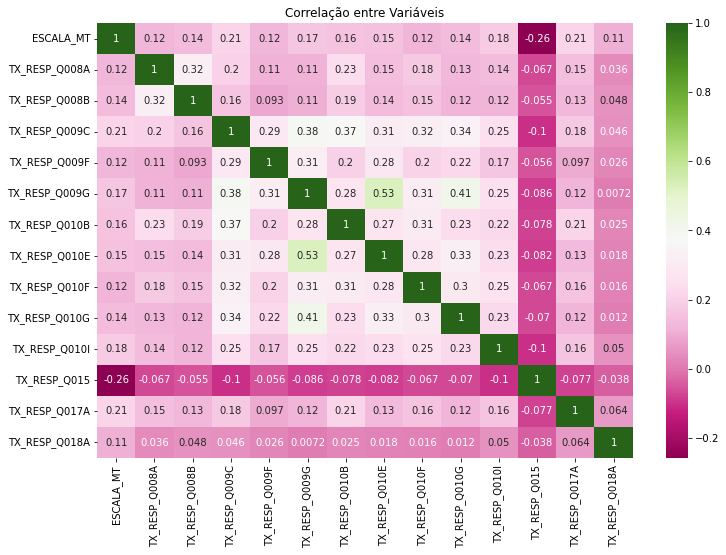

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df_home.corr(method="spearman"), annot=True, cmap="PiYG")
plt.title("Correlação entre Variáveis")
plt.show()

# Variáveis

8a - Se sua rua é pavimentada.

8b - Se tem água tratada.

9c - Quantos computadores ou notebooks existem na sua casa.

9f - Quantos banheiros existem na sua casa.

9g - Quantos carros existem na sua casa.

10b - Se tem Wifi em casa

10e - Se tem garagem em casa.

10f - Se tem forno microondas em casa.

10i - Se tem geladeira ou freezer em casa.

15 - numéro de reprovação.

17a - tempo de lazer fora da escola.

18a - Frequencia ler notícias.

C:\Users\wfs4.NB555-WFS4\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


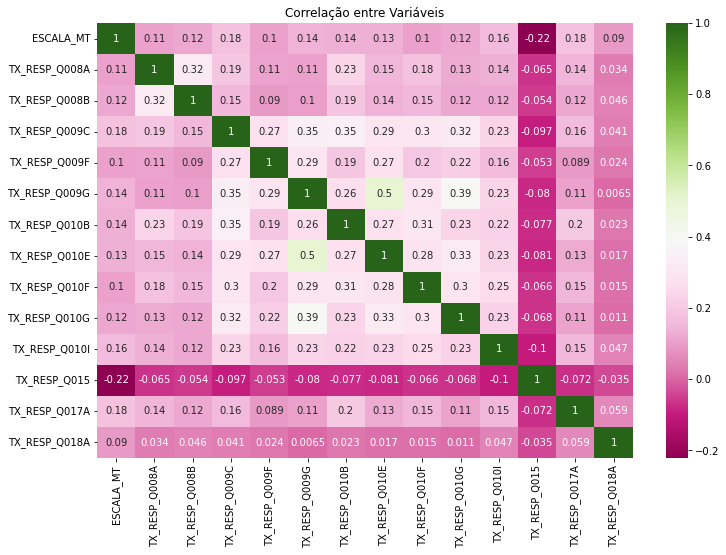

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df_home.corr(method="kendall"), annot=True, cmap="PiYG")
plt.title("Correlação entre Variáveis")
plt.show()

In [23]:
# Importar metrica
from sklearn.feature_selection import chi2

# Split dataset
X = df_home.drop(['ESCALA_MT'], axis=1)
y = df_home.ESCALA_MT

# Calculando Chi-Squared
chi_scores = chi2(X,y)

# Colocando label nos resultados para posterior plot
scores = pd.Series(chi_scores[0], index=X.columns)
pvalues = pd.Series(chi_scores[1], index=X.columns)

# Results
pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})

,Chi2,p-Value
TX_RESP_Q008A,2984.296654,0.0
TX_RESP_Q008B,3099.543896,0.0
TX_RESP_Q009C,32702.914092,0.0
TX_RESP_Q009F,4744.934673,0.0
TX_RESP_Q009G,16908.004367,0.0
TX_RESP_Q010B,4728.417168,0.0
TX_RESP_Q010E,8279.283691,0.0
TX_RESP_Q010F,4749.826092,0.0
TX_RESP_Q010G,11367.496516,0.0
TX_RESP_Q010I,6854.891108,0.0


In [24]:
# Implementando metodos

# Split dataset in features and target variable

X = df_home.iloc[:, 1:].values # Features
y = df_home.iloc[:, 1].values # Target variable    
       

In [25]:
######################################
# Importando as libraries
######################################
 
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# Separar dados em Treino e Teste
 
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 1/5, random_state = 0)
 
# Treinando o modelo
 
classifier = LogisticRegression(multi_class='multinomial')
classifier.fit(X_train, y_train)

# Previsao
 
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)

y_pred_prob = y_pred_prob[:,1]

y_result_prob = np.concatenate((y_pred.reshape(len(y_pred),1), y_pred_prob.reshape(len(y_pred_prob),1)),1)

# Matrix de confusao

cm = confusion_matrix(y_test, y_pred)
print(cm)

y_result = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

print(accuracy_score(y_test, y_pred))

[[ 39135      0]
 [     0 135161]]
1.0


In [33]:
y_pred.coef

AttributeError: 'numpy.ndarray' object has no attribute 'coef'

In [26]:
df_home.head()

,ESCALA_MT,TX_RESP_Q008A,TX_RESP_Q008B,TX_RESP_Q009C,TX_RESP_Q009F,TX_RESP_Q009G,TX_RESP_Q010B,TX_RESP_Q010E,TX_RESP_Q010F,TX_RESP_Q010G,TX_RESP_Q010I,TX_RESP_Q015,TX_RESP_Q017A,TX_RESP_Q018A
0,2,0,0,0,1,1,1,1,1,1,1,0,3,0
1,3,0,0,1,1,1,1,1,0,0,1,0,2,0
2,2,0,0,0,1,0,1,0,1,0,1,2,3,1
3,4,0,0,0,1,1,1,0,1,0,1,0,3,1
4,3,0,0,1,1,1,1,0,0,0,1,1,1,1


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_score
from sklearn.model_selection import train_test_split

SEED = 242022

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED, stratify=y)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20, random_state = SEED, stratify=y_train)

# Padronizando separadamente as bases

X_train = preprocessing.minmax_scale(X_train)
X_test = preprocessing.minmax_scale(X_test)
#X_valid = preprocessing.minmax_scale(X_valid)

# Instanciando e treinando modelo

clf = DecisionTreeClassifier(criterion="entropy", random_state=SEED)
model = clf.fit(X_train, y_train)

# Avaliando o modelo

print("Score de treino:", precision_score(y_test, clf.predict(X_test), average="micro"))

print(classification_report(y_test, clf.predict(X_test)))

Score de treino: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39082
           1       1.00      1.00      1.00    135214

    accuracy                           1.00    174296
   macro avg       1.00      1.00      1.00    174296
weighted avg       1.00      1.00      1.00    174296



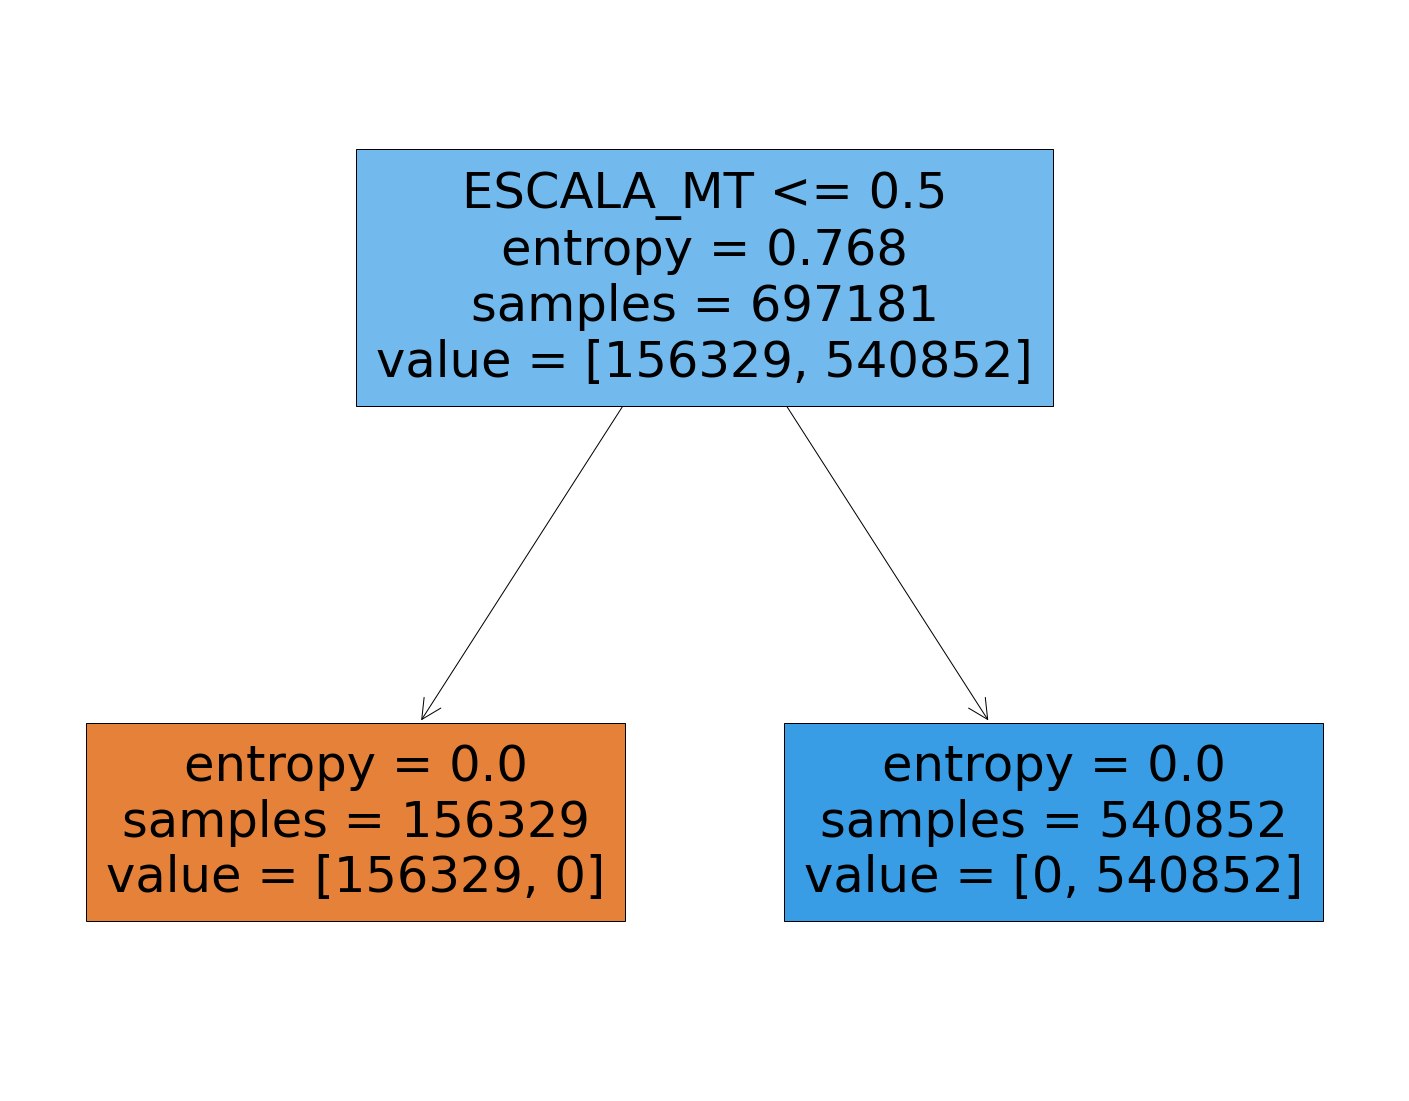

In [32]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=catOrdinais
                 
                   ,
                   filled=True)


In [39]:
df["ESCALA_MT"].shape

(871477,)

In [40]:
df_home["ESCALA_MT"].shape

(871477,)

# Análises por regiões
Região 1 = Norte

Região 2 = Nordeste
 
Região 3 = Sudeste

Região 4 = Sul

Região 5 = Centro-oeste


In [59]:
df_região_1 = df[df['ID_REGIAO']==1].iloc[:, 6:]

# Transformando dados categoricos
label = preprocessing.LabelEncoder()
data_encoded1 = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded1[i]=label.fit_transform(df_região_1[i])
data_encoded1.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
0,0,2,1,0,1,1,1,4,3,2,...,3,0,3,1,0,0,0,0,2,2
1,0,2,1,1,1,0,0,4,3,1,...,2,0,3,2,0,0,0,0,3,3
2,0,2,1,0,1,0,0,2,5,0,...,3,0,3,1,0,1,0,0,3,2
3,0,2,1,1,1,0,0,2,0,1,...,3,0,3,1,3,1,0,0,2,4
4,0,2,1,1,1,0,0,5,1,1,...,1,0,3,1,1,1,1,1,3,3


In [60]:
data_encoded1.corr(method='spearman')

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
TX_RESP_Q001,1.000000,0.034665,-0.011664,-0.011920,-0.006163,0.015840,0.024168,0.006448,0.000695,-0.009008,...,-0.014742,0.021498,-0.011131,-0.016336,0.024604,-0.002580,0.003760,0.015459,-0.000941,-0.045231
TX_RESP_Q002,0.034665,1.000000,-0.018764,-0.008188,0.025828,-0.006276,0.008773,0.010484,0.026259,-0.045629,...,-0.047133,-0.024149,0.003480,-0.022311,0.020174,-0.032823,-0.011353,0.008039,0.042611,-0.059819
TX_RESP_Q003A,-0.011664,-0.018764,1.000000,0.344248,0.284124,-0.294303,-0.246568,-0.037766,-0.020648,0.080970,...,0.054087,0.021300,0.035700,0.026630,-0.026388,0.028868,0.019700,0.005159,-0.029471,0.103296
TX_RESP_Q003B,-0.011920,-0.008188,0.344248,1.000000,0.215411,-0.274820,-0.247365,-0.027887,-0.159458,0.061209,...,0.008919,0.008748,0.013430,0.031312,0.007785,0.011367,0.015397,0.001826,-0.027918,0.055543
TX_RESP_Q003C,-0.006163,0.025828,0.284124,0.215411,1.000000,-0.142322,-0.140574,-0.039918,-0.029685,-0.005594,...,-0.045981,-0.027495,0.047528,0.013666,0.003751,0.001241,0.025554,0.030635,0.008451,-0.024289
TX_RESP_Q003D,0.015840,-0.006276,-0.294303,-0.274820,-0.142322,1.000000,0.427095,0.044962,0.077890,-0.020371,...,0.019938,0.028073,-0.055306,-0.002484,-0.003258,0.007795,-0.001437,0.017187,0.004395,-0.032754
TX_RESP_Q003E,0.024168,0.008773,-0.246568,-0.247365,-0.140574,0.427095,1.000000,0.038811,0.064895,-0.025683,...,0.011066,0.016322,-0.025327,-0.004360,0.002565,0.012530,0.008159,0.024296,0.009291,-0.030724
TX_RESP_Q004,0.006448,0.010484,-0.037766,-0.027887,-0.039918,0.044962,0.038811,1.000000,0.443546,-0.012505,...,0.056679,-0.004475,-0.052751,-0.035413,-0.040212,-0.033104,-0.050807,-0.028063,0.045857,0.017430
TX_RESP_Q005,0.000695,0.026259,-0.020648,-0.159458,-0.029685,0.077890,0.064895,0.443546,1.000000,-0.046807,...,0.026812,-0.031586,-0.034135,-0.037231,-0.051283,-0.031785,-0.044984,-0.024299,0.074222,-0.018992
TX_RESP_Q006A,-0.009008,-0.045629,0.080970,0.061209,-0.005594,-0.020371,-0.025683,-0.012505,-0.046807,1.000000,...,-0.012963,0.106321,0.020854,0.212012,-0.031106,0.134825,0.147509,0.095162,-0.079026,0.025683


In [61]:
df_região_2 = df[df['ID_REGIAO']==2].iloc[:, 6:]

# Transformando dados categoricos
data_encoded2 = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded2[i]=label.fit_transform(df_região_2[i])
data_encoded2.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
0,0,0,1,0,1,0,0,5,5,0,...,3,0,1,1,0,0,1,0,3,1
1,0,2,1,1,1,0,0,3,3,1,...,3,0,3,1,0,1,2,1,2,4
2,0,2,1,1,1,0,0,4,4,2,...,2,2,3,2,0,1,2,0,0,4
3,0,2,1,0,1,0,0,2,5,2,...,3,0,2,1,0,0,1,1,0,0
4,0,2,1,0,1,0,0,5,5,1,...,1,0,2,3,0,1,2,2,0,1


In [62]:
data_encoded2.corr(method='spearman')

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
TX_RESP_Q001,1.000000,0.012013,-0.011959,-0.004559,-0.007360,0.010399,0.013755,0.010545,0.000724,-0.012521,...,0.002340,0.020079,-0.011670,-0.020373,0.017738,-0.008226,-0.000819,0.013331,0.005537,-0.036061
TX_RESP_Q002,0.012013,1.000000,-0.019386,-0.005512,0.020744,-0.001277,0.009150,0.024733,0.038931,-0.030126,...,-0.044497,-0.012596,0.009993,-0.016408,0.013600,-0.029793,-0.012043,0.005501,0.047700,-0.039190
TX_RESP_Q003A,-0.011959,-0.019386,1.000000,0.355038,0.282475,-0.354284,-0.293340,-0.053246,-0.039029,0.077957,...,0.036645,0.013903,0.023411,0.033379,-0.026422,0.030305,0.021436,0.006905,-0.031764,0.088824
TX_RESP_Q003B,-0.004559,-0.005512,0.355038,1.000000,0.209101,-0.306805,-0.261477,-0.026861,-0.166747,0.059784,...,-0.008042,0.011546,-0.001393,0.037306,0.005904,0.012959,0.005109,-0.000897,-0.022132,0.052403
TX_RESP_Q003C,-0.007360,0.020744,0.282475,0.209101,1.000000,-0.162418,-0.151660,-0.026228,-0.032134,-0.004978,...,-0.054852,-0.011525,0.048938,0.012551,0.012755,-0.008597,0.026052,0.034795,0.005096,-0.014887
TX_RESP_Q003D,0.010399,-0.001277,-0.354284,-0.306805,-0.162418,1.000000,0.421812,0.052790,0.077531,-0.026094,...,0.020163,0.015360,-0.048300,-0.012014,0.002767,-0.006802,-0.009034,0.010326,0.007122,-0.038881
TX_RESP_Q003E,0.013755,0.009150,-0.293340,-0.261477,-0.151660,0.421812,1.000000,0.032239,0.059802,-0.033668,...,0.011952,0.012654,-0.012977,-0.010411,0.015348,0.001185,-0.000002,0.016163,0.014726,-0.035402
TX_RESP_Q004,0.010545,0.024733,-0.053246,-0.026861,-0.026228,0.052790,0.032239,1.000000,0.456942,-0.012932,...,0.023461,-0.018564,-0.059526,-0.027998,-0.016670,-0.044608,-0.049731,-0.019259,0.067542,-0.020608
TX_RESP_Q005,0.000724,0.038931,-0.039029,-0.166747,-0.032134,0.077531,0.059802,0.456942,1.000000,-0.048722,...,0.004251,-0.050164,-0.038820,-0.040849,-0.035124,-0.050312,-0.042697,-0.018729,0.081716,-0.050459
TX_RESP_Q006A,-0.012521,-0.030126,0.077957,0.059784,-0.004978,-0.026094,-0.033668,-0.012932,-0.048722,1.000000,...,-0.033527,0.107905,0.034649,0.226815,-0.033204,0.121617,0.152385,0.103315,-0.065749,0.017108


In [63]:
df_região_3 = df[df['ID_REGIAO']==3].iloc[:, 6:]

# Transformando dados categoricos
data_encoded3 = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded3[i]=label.fit_transform(df_região_3[i])
data_encoded3.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
0,0,2,1,1,1,0,0,5,5,1,...,3,0,2,2,0,1,1,1,3,3
1,0,2,1,0,1,0,0,4,3,2,...,3,2,3,2,0,2,2,0,2,6
2,0,2,1,1,0,0,0,3,1,1,...,3,0,1,1,0,1,1,0,2,3
3,0,2,1,1,1,0,0,3,3,2,...,1,1,0,1,2,2,0,0,2,0
4,0,1,1,0,1,0,0,4,5,1,...,2,0,2,2,3,1,1,1,2,5


In [64]:
data_encoded3.corr(method='spearman')

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
TX_RESP_Q001,1.000000,0.027634,-0.015908,-0.005610,-0.000367,0.010540,0.020363,0.010948,0.007599,-0.017731,...,-0.018448,0.021121,-0.012389,-0.015702,0.025995,-0.006301,0.008110,0.021596,0.000803,-0.036043
TX_RESP_Q002,0.027634,1.000000,-0.025810,-0.025134,0.034260,0.000834,0.030622,0.014143,0.036327,-0.050135,...,-0.047805,-0.029894,0.021766,-0.034508,0.036371,-0.037422,-0.022115,0.017100,0.054823,-0.108975
TX_RESP_Q003A,-0.015908,-0.025810,1.000000,0.213864,0.206784,-0.283083,-0.236097,-0.042241,-0.020671,0.072536,...,0.021880,0.029550,0.032554,0.039530,-0.029756,0.019174,0.024710,0.003768,-0.020362,0.079377
TX_RESP_Q003B,-0.005610,-0.025134,0.213864,1.000000,0.137119,-0.243589,-0.211474,-0.015906,-0.173567,0.053390,...,-0.000844,0.027742,0.007867,0.038435,0.009768,0.006727,0.008245,-0.000671,-0.021221,0.065814
TX_RESP_Q003C,-0.000367,0.034260,0.206784,0.137119,1.000000,-0.109698,-0.085338,-0.003579,-0.001030,-0.043864,...,-0.044151,-0.043725,0.080912,-0.005598,0.019355,-0.011632,0.006132,0.020271,0.022085,-0.029902
TX_RESP_Q003D,0.010540,0.000834,-0.283083,-0.243589,-0.109698,1.000000,0.407804,0.051757,0.071841,-0.017604,...,0.014345,-0.000271,-0.061709,-0.020365,0.004349,-0.013174,-0.017324,0.013319,0.012011,-0.047221
TX_RESP_Q003E,0.020363,0.030622,-0.236097,-0.211474,-0.085338,0.407804,1.000000,0.026520,0.057348,-0.033532,...,-0.003320,-0.012191,-0.020747,-0.019799,0.017595,-0.006806,-0.010853,0.019507,0.021762,-0.067570
TX_RESP_Q004,0.010948,0.014143,-0.042241,-0.015906,-0.003579,0.051757,0.026520,1.000000,0.470996,-0.010255,...,0.016350,-0.018302,-0.060775,-0.039483,-0.020186,-0.062258,-0.058759,-0.006956,0.059124,-0.046697
TX_RESP_Q005,0.007599,0.036327,-0.020671,-0.173567,-0.001030,0.071841,0.057348,0.470996,1.000000,-0.043813,...,0.004560,-0.049140,-0.040073,-0.049462,-0.040110,-0.062140,-0.052726,-0.004930,0.074469,-0.084828
TX_RESP_Q006A,-0.017731,-0.050135,0.072536,0.053390,-0.043864,-0.017604,-0.033532,-0.010255,-0.043813,1.000000,...,-0.022595,0.106666,0.041848,0.230288,-0.032050,0.132333,0.147362,0.069860,-0.071601,0.066125


In [65]:
df_região_4 = df[df['ID_REGIAO']==4].iloc[:, 6:]

# Transformando dados categoricos
data_encoded4 = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded4[i]=label.fit_transform(df_região_4[i])
data_encoded4.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
0,0,0,1,1,1,0,0,3,2,1,...,3,1,3,1,0,0,0,0,2,4
1,0,0,1,1,1,0,0,3,2,1,...,2,0,2,1,0,1,1,1,2,0
2,0,0,1,1,1,0,0,3,2,1,...,1,1,0,1,0,1,1,2,0,0
3,0,2,1,1,0,0,0,3,5,1,...,3,1,3,1,0,1,2,2,2,5
4,0,0,0,0,0,0,1,4,4,2,...,3,0,1,3,0,2,0,0,2,7


In [66]:
data_encoded4.corr(method='spearman')

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
TX_RESP_Q001,1.000000,0.020337,-0.013388,-0.004698,-0.002360,0.018592,0.016409,0.010375,0.000764,-0.013933,...,-0.013608,0.013615,-0.009357,-0.011631,0.028781,-0.000643,0.001355,0.009763,0.000164,-0.027060
TX_RESP_Q002,0.020337,1.000000,-0.047301,-0.052315,0.053405,0.013598,0.053278,0.008615,0.045914,-0.071662,...,-0.044339,-0.035778,0.010642,-0.068000,0.016765,-0.050840,-0.035395,0.048108,0.070583,-0.134994
TX_RESP_Q003A,-0.013388,-0.047301,1.000000,0.261578,0.188320,-0.293503,-0.261881,-0.030832,-0.015539,0.074840,...,0.011274,0.032423,0.023684,0.037237,-0.021924,0.015337,0.026943,-0.001681,-0.017030,0.079302
TX_RESP_Q003B,-0.004698,-0.052315,0.261578,1.000000,0.133397,-0.243895,-0.228332,-0.014567,-0.182372,0.055754,...,-0.013860,0.030040,0.025967,0.043685,0.022917,0.004974,0.014481,-0.003957,-0.027631,0.066438
TX_RESP_Q003C,-0.002360,0.053405,0.188320,0.133397,1.000000,-0.102501,-0.074585,0.005606,0.003885,-0.044931,...,-0.046198,-0.037486,0.087764,-0.003488,0.009321,-0.015848,0.008669,0.029372,0.019980,-0.020877
TX_RESP_Q003D,0.018592,0.013598,-0.293503,-0.243895,-0.102501,1.000000,0.329875,0.033694,0.061569,-0.024833,...,0.011527,-0.003742,-0.050973,-0.011889,-0.002725,-0.005835,-0.011439,0.020381,0.007248,-0.042814
TX_RESP_Q003E,0.016409,0.053278,-0.261881,-0.228332,-0.074585,0.329875,1.000000,0.011595,0.050108,-0.038494,...,-0.002036,-0.020979,-0.015867,-0.020580,0.000921,-0.004306,-0.010594,0.020124,0.019981,-0.061888
TX_RESP_Q004,0.010375,0.008615,-0.030832,-0.014567,0.005606,0.033694,0.011595,1.000000,0.471495,0.016963,...,0.048131,0.010026,-0.063085,-0.025063,-0.051742,-0.045504,-0.027040,0.004773,0.034966,0.018225
TX_RESP_Q005,0.000764,0.045914,-0.015539,-0.182372,0.003885,0.061569,0.050108,0.471495,1.000000,-0.018947,...,0.042224,-0.020737,-0.055535,-0.030628,-0.072673,-0.049387,-0.024611,0.012987,0.055992,-0.031871
TX_RESP_Q006A,-0.013933,-0.071662,0.074840,0.055754,-0.044931,-0.024833,-0.038494,0.016963,-0.018947,1.000000,...,-0.026391,0.103082,0.050575,0.242816,-0.033537,0.136854,0.158138,0.053781,-0.078332,0.056343


In [67]:
df_região_5 = df[df['ID_REGIAO']==5].iloc[:, 6:]

# Transformando dados categoricos
data_encoded5 = pd.DataFrame() 

for i in df_aux.columns:
    data_encoded5[i]=label.fit_transform(df_região_5[i])
data_encoded5.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q003A,TX_RESP_Q003B,TX_RESP_Q003C,TX_RESP_Q003D,TX_RESP_Q003E,TX_RESP_Q004,TX_RESP_Q005,TX_RESP_Q006A,...,TX_RESP_Q017A,TX_RESP_Q017B,TX_RESP_Q017C,TX_RESP_Q017D,TX_RESP_Q017E,TX_RESP_Q018A,TX_RESP_Q018B,TX_RESP_Q018C,TX_RESP_Q019,ESCALA_MT
0,0,2,1,1,1,0,0,5,5,1,...,3,0,1,1,0,0,1,1,3,4
1,0,3,1,1,1,0,0,3,3,2,...,2,0,1,1,0,1,1,0,2,5
2,0,2,1,1,1,0,0,0,0,1,...,1,0,2,1,0,2,1,1,3,5
3,0,0,1,1,0,0,0,2,2,1,...,3,0,1,2,0,1,0,1,2,4
4,0,0,0,0,1,1,0,3,3,1,...,3,0,3,3,0,0,1,0,2,4


In [34]:
data_encoded5.corr(method='spearman')

NameError: name 'data_encoded5' is not defined